### Joakim Roberg AI23 - Machinelearning

# Laboratory

### **Assignment** 1 - Classification of cardiovascular disease
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/cardio_train.csv', sep=';').drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


---
## 1. Introduction
###  1.1 Background
###  1.2 Purpose
###  1.3 Methodology
###  1.4 Expectations
---

### 1.1 Background

Heart and vascular diseases pose a significan global health risk, and it is therefore important to be able to classify and identify risk factors for these diseases reliably. In this laboratory, we use a dataset containing data for cardiovascular diseases to perform exploratory data analysis (EDA) and design models for classifying these diseases.

### 1.2 Purpose

The purpose of the laboratory is to explore and analyze the given dataset for cadriovascular diseases to understand the prevalence of cardiovascular diseases and their risk factors. We will also design and evaluate varios models to classify heart and vascular diseases based on available data attributes.

---
## 1.3 Methodology

We will use pandas, matplotlib and seaborn to conduct a exploratory data-analysius (EDA) on the given dataset. We will then create a heatmap to investigate the correlations between different data attributes and use feature engineering to create new relevant features such as BMI categories and blood preessure categories. Finally, we will implement and evaluate multiple machine learning algorithms to classify hear and vascular diseases.

### 1.3.1 Data Preprocessing

cardio
0    35021
1    34979
Name: count, dtype: int64

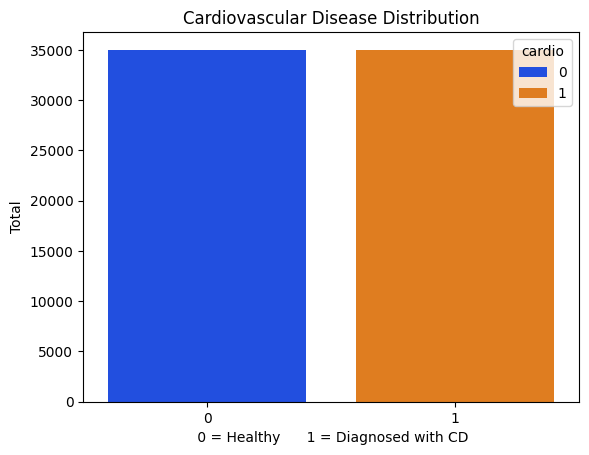

In [2]:
ax = sns.countplot(x="cardio", data=df, palette="bright", hue="cardio")

ax.set(title="Cardiovascular Disease Distribution", xlabel=" 0 = Healthy      1 = Diagnosed with CD", ylabel="Total")
df["cardio"].value_counts()

<Axes: xlabel='cholesterol', ylabel='count'>

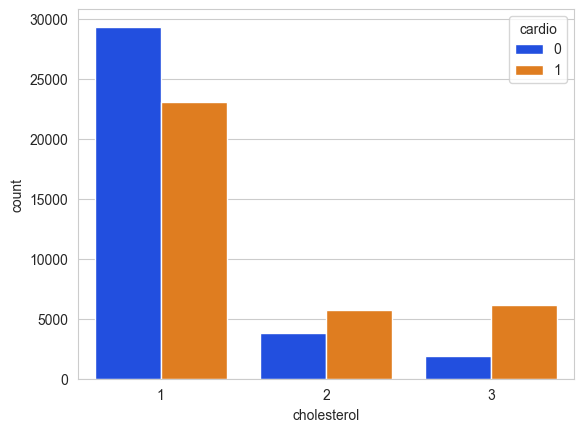

In [3]:
sns.set_style("whitegrid")
sns.countplot(df, x = "cholesterol", hue = "cardio", palette = "bright")

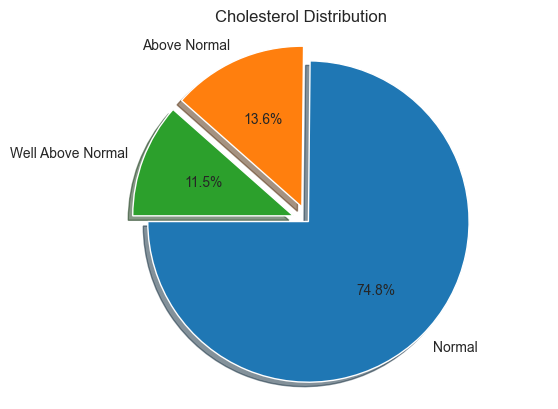

In [4]:
labels = ["Normal", "Above Normal", "Well Above Normal"]
sizes = df["cholesterol"].value_counts().values
explode = (0, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=180)
ax1.axis("equal")
plt.title("Cholesterol Distribution")
plt.show()

In [5]:
df["age"] = df["age"] / 365
df["age"] = df["age"].astype("int")
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


[Text(0.5, 1.0, 'Age Distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Total')]

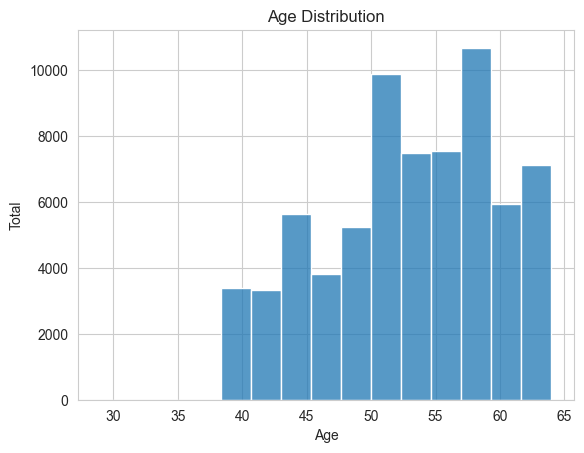

In [6]:
ax = sns.histplot(df["age"], bins=15)
ax.set(title="Age Distribution", xlabel="Age", ylabel="Total")

### 1.4 Expectations

We expect that the EDA process will provide insights into the prevalence of cardiovascular diseases in the dataset and identify key risk factors and patterns. By creating new features and exploring correlations, we also expect to improve the performance of the models in classifying heart and vascular diseases.
